<a href="https://colab.research.google.com/github/tayabr/Springboard/blob/main/Uber_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of New York City Uber Pickups

Uber Technologies, Inc., commonly known as Uber, is an American technology company. Its services include ride-hailing, food delivery, package delivery, couriers, freight transportation, and, through a partnership with Lime, electric bicycle and motorized scooter rental.

We will be using data regarding Uber ride-hailing. New drivers sign up every day to drive for Uber, especially in New York City.

We will use Python to:

1. Check trip length for Uber pickups in NYC
2. Discover the time of day with the most pickups
3. Discover which day of the week has the most trips
4. Figure out the most popular pickup locations for Uber trips in NYC
5. Discover the likelihood of a driver receiving a tip from a passenger



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import urllib.request


In [3]:
# Import January 2022 data from Taxi and Limo Commission (TLC) website

url = "https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2022-01.parquet"
filename, headers = urllib.request.urlretrieve(url)
df = pd.read_parquet(filename)

In [4]:
# Import February 2022 data from TLC website

url = "https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2022-02.parquet"
filename, headers = urllib.request.urlretrieve(url)
df2 = pd.read_parquet(filename)

In [5]:
# Import March 2022 data from TLC website
url = "https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2022-03.parquet"
filename, headers = urllib.request.urlretrieve(url)
df3 = pd.read_parquet(filename)

In [6]:
# Import April 2022 data from TLC website

url = "https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2022-04.parquet"
filename, headers = urllib.request.urlretrieve(url)
df4 = pd.read_parquet(filename)

In [7]:
# Import May 2022 data from TLC website

url = "https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2022-05.parquet"
filename, headers = urllib.request.urlretrieve(url)
df5 = pd.read_parquet(filename)

In [8]:
# Import June 2022 data from TLC website

url = "https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2022-06.parquet"
filename, headers = urllib.request.urlretrieve(url)
df6 = pd.read_parquet(filename)

In [9]:
# Combine the dataframes to one

uber_df = pd.concat([df, df2, df3, df4, df5, df6])
uber_df.shape

(102914393, 24)

In [10]:
#Delete dataframes Jan to June to free up memory

del df, df2, df3, df4, df5, df6

In [11]:
# Filter the dataframe to only include Uber rides. Uber's TLC license number is HV0003
uber_df = uber_df[uber_df['hvfhs_license_num'].str.contains('HV0003')]
uber_df.shape

(74789774, 24)

In [12]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74789774 entries, 0 to 17780073
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [12]:
# Drop rows containing null or n/a values

uber_df.dropna().reset_index(drop=True)
uber_df.shape

(74789774, 24)

In [14]:
uber_df.describe()

,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,7.478977e+07,7.478977e+07,7.478977e+07,7.478977e+07,7.478977e+07,7.478977e+07,7.478977e+07,7.478977e+07,7.478977e+07,7.478977e+07,7.478977e+07,7.478977e+07
mean,1.398292e+02,1.434030e+02,4.973280e+00,1.144687e+03,2.351354e+01,1.102638e+00,7.456079e-01,2.007208e+00,1.181010e+00,1.893170e-01,1.025581e+00,1.881256e+01
std,7.503334e+01,7.778883e+01,5.796234e+00,8.206943e+02,1.948489e+01,3.808931e+00,6.544164e-01,1.621454e+00,1.361306e+00,6.662695e-01,2.955160e+00,1.517930e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-5.201100e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.910000e+02
25%,7.600000e+01,7.600000e+01,1.580000e+00,5.840000e+02,1.138000e+01,0.000000e+00,3.400000e-01,9.600000e-01,0.000000e+00,0.000000e+00,0.000000e+00,8.980000e+00
50%,1.410000e+02,1.430000e+02,2.960000e+00,9.300000e+02,1.820000e+01,0.000000e+00,5.500000e-01,1.560000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.453000e+01
75%,2.110000e+02,2.200000e+02,6.140000e+00,1.462000e+03,2.888000e+01,0.000000e+00,9.000000e-01,2.510000e+00,2.750000e+00,0.000000e+00,0.000000e+00,2.350000e+01
max,2.650000e+02,2.650000e+02,6.287000e+02,1.479180e+05,4.995960e+03,1.623300e+02,1.645600e+02,4.868300e+02,5.500000e+00,7.500000e+00,2.031600e+02,4.643190e+03


# Identify outliers using IQR method

In [ ]:
#q1_miles, q3_miles = uber_df['trip_miles'].quantile([0.25, 0.75])
#q1_time, q3_time = uber_df['trip_time'].quantile([0.25, 0.75])
#q1_base_fare, q3_base_fare = uber_df['base_passenger_fare'].quantile([0.25, 0.75])
#q1_tax, q3_tax = uber_df['sales_tax'].quantile([0.25, 0.75])
#q1_driver_pay, q3_driver_pay = uber_df['driver_pay'].quantile([0.25, 0.75])
#iqr_miles = q3_miles - q1_miles
#iqr_time = q3_time - q1_time
#iqr_base_fare = q3_base_fare - q1_base_fare
#iqr_tax = q3_tax - q1_tax
#iqr_driver_pay = q3_driver_pay - q1_driver_pay

#print(iqr_miles, iqr_time, iqr_base_fare, iqr_tax, iqr_driver_pay)


4.56 878.0 17.5 1.5499999999999998 14.52


In [ ]:
#outliers_miles = uber_df[(uber_df['trip_miles'] < q1_miles - 1.5*iqr_miles) | (uber_df['trip_miles'] > q3_miles + 1.5*iqr_miles)]
#outliers_time = uber_df[(uber_df['trip_time'] < q1_time - 1.5*iqr_time) | (uber_df['trip_time'] > q3_time + 1.5*iqr_time)]
#outliers_base_fare = uber_df[(uber_df['base_passenger_fare'] < q1_base_fare - 1.5*iqr_base_fare) | (uber_df['base_passenger_fare'] > q3_base_fare + 1.5*iqr_base_fare)]
#outliers_tax = uber_df[(uber_df['sales_tax'] < q1_tax - 1.5*iqr_tax) | (uber_df['sales_tax'] > q3_tax + 1.5*iqr_tax)]
#outliers_driver_pay = uber_df[(uber_df['driver_pay'] < q1_driver_pay - 1.5*iqr_driver_pay) | (uber_df['driver_pay'] > q3_driver_pay + 1.5*iqr_driver_pay)]



In [ ]:
#print('Outliers in miles:')
#print(outliers_miles)
#print('Outliers in time:')
#print(outliers_time)
#print('Outliers in base fare:')
#print(outliers_base_fare)
#print('Outliers in tax:')
#print(outliers_tax)
#print('Outliers in driver pay:')
#print(outliers_driver_pay)

In [ ]:
#uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74789768 entries, 0 to 17780073
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

## Identify outliers using the z-score method

In [13]:
# Calculate the z-score for each specified column
z = np.abs((uber_df[['trip_miles', 'trip_time', 'base_passenger_fare', 'sales_tax', 'driver_pay']] - uber_df[['trip_miles', 'trip_time', 'base_passenger_fare', 'sales_tax', 'driver_pay']].mean()) / uber_df[['trip_miles', 'trip_time', 'base_passenger_fare', 'sales_tax', 'driver_pay']].std())


In [14]:
# Remove any rows that have at least one z-score greater than 3

uber_df = uber_df[(z < 3).all(axis=1)]


In [17]:
uber_df.shape

(72213065, 24)

In [18]:
uber_df.describe()

,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,7.221306e+07,7.221306e+07,7.221306e+07,7.221306e+07,7.221306e+07,7.221306e+07,7.221306e+07,7.221306e+07,7.221306e+07,7.221306e+07,7.221306e+07,7.221306e+07
mean,1.396588e+02,1.420887e+02,4.322150e+00,1.057167e+03,2.113764e+01,8.561111e-01,6.660298e-01,1.865333e+00,1.174882e+00,1.567499e-01,8.878704e-01,1.696521e+01
std,7.534016e+01,7.709736e+01,4.024779e+00,6.429994e+02,1.286101e+01,3.203399e+00,4.415438e-01,1.205291e+00,1.360411e+00,6.104984e-01,2.346690e+00,1.045986e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-3.485000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.482000e+01
25%,7.600000e+01,7.600000e+01,1.550000e+00,5.730000e+02,1.117000e+01,0.000000e+00,3.400000e-01,9.600000e-01,0.000000e+00,0.000000e+00,0.000000e+00,8.830000e+00
50%,1.410000e+02,1.420000e+02,2.830000e+00,9.030000e+02,1.767000e+01,0.000000e+00,5.300000e-01,1.530000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.408000e+01
75%,2.120000e+02,2.160000e+02,5.630000e+00,1.389000e+03,2.737000e+01,0.000000e+00,8.500000e-01,2.420000e+00,2.750000e+00,0.000000e+00,0.000000e+00,2.223000e+01
max,2.650000e+02,2.650000e+02,2.236000e+01,3.606000e+03,8.196000e+01,6.191000e+01,1.008000e+01,6.870000e+00,5.500000e+00,7.500000e+00,2.000000e+02,6.435000e+01


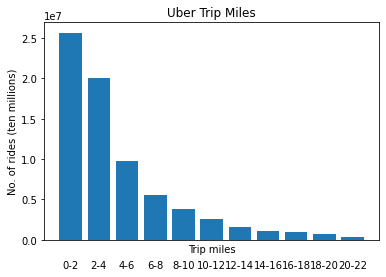

In [19]:
# What is the most frequent length of rides in miles?
# Create bins for the histogram
bins = np.arange(0, 24, 2)

# Create the histogram
plt.hist(uber_df['trip_miles'], bins=bins, rwidth=0.8)

# Add labels
plt.ylabel('No. of rides (ten millions)')
plt.xlabel('Trip miles')
plt.title('Uber Trip Miles')

# Add the bin ranges as pop ups
for i in range(len(bins) - 1):
    plt.annotate(str(bins[i]) + '-' + str(bins[i+1]), xy=(bins[i] + 1, 0), xycoords=('data', 'axes fraction'),
                 xytext=(0, -20), textcoords='offset points', va='top', ha='center')

# Remove the x-axis ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

More than a third of rides are 0-2 miles in length. More than half of all rides are between 0 and 4 miles.

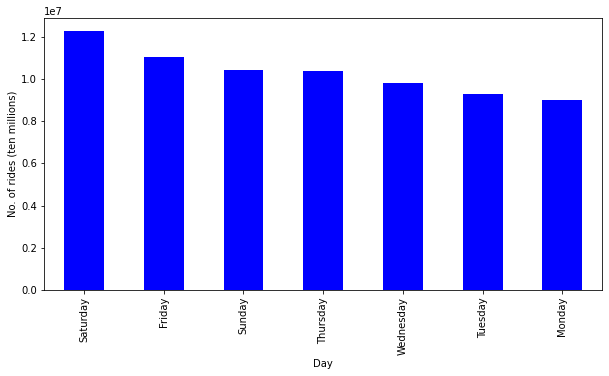

In [20]:
# Which day of the week to people take uber rides most often?
day_name = uber_df['pickup_datetime'].dt.day_name().value_counts()
day_name.plot(kind='bar', color='blue', figsize=(10,5))
plt.xlabel('Day')
plt.ylabel('No. of rides (ten millions)')
plt.show()

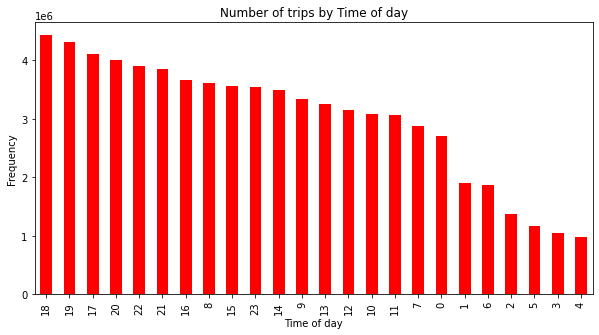

In [21]:
# Let's get the hourly count of rides to determine which hour of the day has the most rides
hours = uber_df['pickup_datetime'].dt.hour.value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Time of day')
plt.ylabel('Frequency')
plt.title('Number of trips by Time of day')
plt.show()

The majority of rides occur between 4pm and 9pm, with the most rides occuring in the 6pm hour.

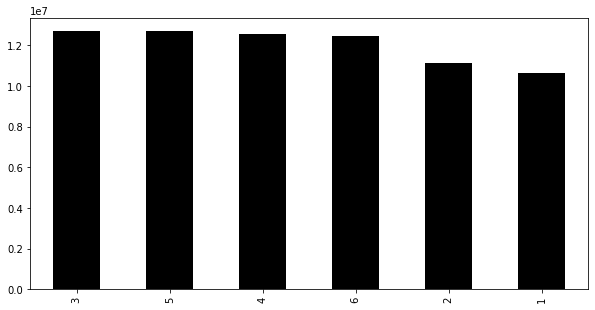

In [22]:
month = uber_df['pickup_datetime'].dt.month.value_counts().plot(kind='bar',figsize=(10,5),color='black')
plt.show()

There is no significant difference in the number of rides per month. March through June have an approximately equal amount of rides. The lowest amount is in January, but the ride counts for each month are in excess of 10 million

In [23]:
pickup_location = uber_df.groupby('PULocationID', as_index=False).size().sort_values(by="size", ascending=False)
top_five_pickup_location = pickup_location.head(5)
top_five_pickup_location

,PULocationID,size
78,79,1131983
135,138,1045298
227,230,973395
228,231,955946
60,61,927169


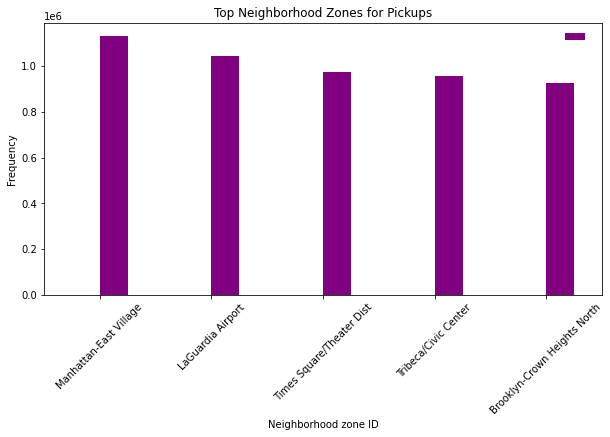

In [ ]:
labels = ['Manhattan-East Village', 'LaGuardia Airport', 'Times Square/Theater Dist', 'Tribeca/Civic Center', 'Brooklyn-Crown Heights North']
top_five_pickup_location.plot(kind='bar',color='purple',figsize=(10,5))
plt.xlabel('Neighborhood zone ID')
plt.ylabel('Frequency')
plt.xticks(range(len(top_five_pickup_location)), labels, rotation=45)
plt.title('Top Neighborhood Zones for Pickups')
plt.legend([''], frameon=False)
plt.show()

The most pickups occur from location 79, which is East Village, Manhattan

In [15]:
uber_df['has_tip'] = uber_df['tips'] > 0

<ipython-input-15-646680b29874>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_df['has_tip'] = uber_df['tips'] > 0


In [36]:
# What is the percentage of trips where the driver is given a tip for service?

tip_percent = round(uber_df['has_tip'].mean() * 100, 2)

print("Percentage of trips with a tip:", tip_percent, "%")

Percentage of trips with a tip: 18.91 %


In [56]:
uber_df.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,has_tip
0,HV0003,B03404,B03404,2022-01-01 00:05:31,2022-01-01 00:05:40,2022-01-01 00:07:24,2022-01-01 00:18:28,170,161,1.18,...,2.75,0.0,0.0,23.03,N,N,,N,N,False
1,HV0003,B03404,B03404,2022-01-01 00:19:27,2022-01-01 00:22:08,2022-01-01 00:22:32,2022-01-01 00:30:12,237,161,0.82,...,2.75,0.0,0.0,12.32,N,N,,N,N,False
2,HV0003,B03404,B03404,2022-01-01 00:43:53,2022-01-01 00:57:37,2022-01-01 00:57:37,2022-01-01 01:07:32,237,161,1.18,...,2.75,0.0,0.0,23.30,N,N,,N,N,False
3,HV0003,B03404,B03404,2022-01-01 00:15:36,2022-01-01 00:17:08,2022-01-01 00:18:02,2022-01-01 00:23:05,262,229,1.65,...,2.75,0.0,0.0,6.30,N,N,,N,N,False
4,HV0003,B03404,B03404,2022-01-01 00:25:45,2022-01-01 00:26:01,2022-01-01 00:28:01,2022-01-01 00:35:42,229,141,1.65,...,2.75,0.0,0.0,7.44,N,N,,N,N,False


In [16]:
uber_df['shared_request_flag'] = uber_df['shared_request_flag'].replace({'Y': True, 'N': False})
uber_df['shared_match_flag'] = uber_df['shared_match_flag'].replace({'Y': True, 'N': False})


In [17]:
uber_df['shared_request_flag'] = uber_df['shared_request_flag'].astype(bool)
uber_df['shared_match_flag'] = uber_df['shared_match_flag'].astype(bool)

In [18]:
uber_df['airport_ride'] = uber_df['airport_fee'] > 0


In [19]:
#create new boolean columns for short rides, med length rides, and long rides to compare tip likelihood

uber_df['short_trip'] = np.where(uber_df['trip_miles'] < 7, True, False)
uber_df['med_trip'] = np.where((uber_df['trip_miles'] >= 7) & (uber_df['trip_miles'] <= 14), True, False)
uber_df['long_trip'] = np.where(uber_df['trip_miles'] > 14, True, False)
uber_df.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,has_tip,airport_ride,short_trip,med_trip,long_trip
0,HV0003,B03404,B03404,2022-01-01 00:05:31,2022-01-01 00:05:40,2022-01-01 00:07:24,2022-01-01 00:18:28,170,161,1.18,...,False,False,,N,N,False,False,True,False,False
1,HV0003,B03404,B03404,2022-01-01 00:19:27,2022-01-01 00:22:08,2022-01-01 00:22:32,2022-01-01 00:30:12,237,161,0.82,...,False,False,,N,N,False,False,True,False,False
2,HV0003,B03404,B03404,2022-01-01 00:43:53,2022-01-01 00:57:37,2022-01-01 00:57:37,2022-01-01 01:07:32,237,161,1.18,...,False,False,,N,N,False,False,True,False,False
3,HV0003,B03404,B03404,2022-01-01 00:15:36,2022-01-01 00:17:08,2022-01-01 00:18:02,2022-01-01 00:23:05,262,229,1.65,...,False,False,,N,N,False,False,True,False,False
4,HV0003,B03404,B03404,2022-01-01 00:25:45,2022-01-01 00:26:01,2022-01-01 00:28:01,2022-01-01 00:35:42,229,141,1.65,...,False,False,,N,N,False,False,True,False,False


In [40]:
# What is the average driver pay for short, med, and long trips?

avg_pay_short = uber_df.loc[uber_df['short_trip'] == True]['driver_pay'].mean().round(2)
avg_pay_med = uber_df.loc[uber_df['med_trip'] == True]['driver_pay'].mean().round(2)
avg_pay_long = uber_df.loc[uber_df['long_trip'] == True]['driver_pay'].mean().round(2)
print("The average pay for short trips is: $",avg_pay_short)
print("The average pay for medium trips is: $",avg_pay_med)
print("The average pay for long trips is: $",avg_pay_long)


The average pay for short trips is: $ 13.41
The average pay for medium trips is: $ 29.36
The average pay for long trips is: $ 42.73


In [20]:
tipped_rides = uber_df[uber_df['has_tip'] == True]
tipped_rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13656927 entries, 7 to 17780073
Data columns (total 29 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [21]:
tipped_rides.to_csv('tipped_rides.csv', index=False)
from google.colab import files
files.download("tipped_rides.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
from google.colab import drive

#mount google drive
drive.mount('/content/drive')

#export dataframe to google drive
tipped_rides.to_csv('/content/drive/My Drive/tipped_rides.csv', index=False)

Mounted at /content/drive


In [23]:
corr_matrix = uber_df.corr()
corr_matrix

,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,has_tip,airport_ride,short_trip,med_trip,long_trip
PULocationID,1.000000,0.126054,-0.006516,-0.000163,0.027785,0.027136,0.029832,0.018341,0.189264,-0.000089,0.028297,0.020655,-0.001531,-0.000096,0.026569,-0.000005,0.007196,-0.005100,-0.005031
DOLocationID,0.126054,1.000000,0.018306,0.011751,0.049453,0.080807,0.059237,0.021807,0.159074,-0.035093,0.027782,0.041299,-0.002249,-0.000835,0.023843,-0.035248,-0.013632,0.014259,0.001472
trip_miles,-0.006516,0.018306,1.000000,0.779430,0.823196,0.447554,0.838153,0.741957,0.037414,0.464119,0.194466,0.851229,0.003378,0.004028,0.041976,0.465621,-0.840979,0.548912,0.670469
trip_time,-0.000163,0.011751,0.779430,1.000000,0.821757,0.334710,0.804972,0.751169,0.145003,0.295961,0.194013,0.874340,0.003364,0.007065,0.053390,0.297039,-0.632488,0.468459,0.406756
base_passenger_fare,0.027785,0.049453,0.823196,0.821757,1.000000,0.411312,0.970857,0.869692,0.207604,0.385852,0.261488,0.929859,-0.001631,0.000543,0.080030,0.387322,-0.680554,0.477228,0.484691
tolls,0.027136,0.080807,0.447554,0.334710,0.411312,1.000000,0.589286,0.095624,-0.020778,0.254617,0.152463,0.412638,-0.001544,-0.000682,0.039869,0.257403,-0.383297,0.229593,0.341664
bcf,0.029832,0.059237,0.838153,0.804972,0.970857,0.589286,1.000000,0.799214,0.175355,0.435676,0.268748,0.918699,-0.001798,0.000362,0.081226,0.436292,-0.698127,0.479894,0.514131
sales_tax,0.018341,0.021807,0.741957,0.751169,0.869692,0.095624,0.799214,1.000000,0.264533,0.373513,0.221691,0.823007,-0.000542,0.000937,0.073058,0.374378,-0.635435,0.479700,0.392776
congestion_surcharge,0.189264,0.159074,0.037414,0.145003,0.207604,-0.020778,0.175355,0.264533,1.000000,-0.025378,0.133611,0.181449,-0.015584,-0.003681,0.123078,-0.024442,-0.043605,0.053080,-0.008382
airport_fee,-0.000089,-0.035093,0.464119,0.295961,0.385852,0.254617,0.435676,0.373513,-0.025378,1.000000,0.190555,0.377879,-0.004075,-0.001361,0.086632,0.996154,-0.435436,0.287883,0.340716


In [26]:
uber_df[uber_df['has_tip']].corr()['tips']

PULocationID            0.028058
DOLocationID            0.034006
trip_miles              0.560730
trip_time               0.541093
base_passenger_fare     0.679065
tolls                   0.394977
bcf                     0.689123
sales_tax               0.554376
congestion_surcharge    0.136896
airport_fee             0.356311
tips                    1.000000
driver_pay              0.643770
shared_request_flag    -0.005086
shared_match_flag      -0.001594
has_tip                      NaN
airport_ride            0.358143
short_trip             -0.489174
med_trip                0.336528
long_trip               0.346251
Name: tips, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bb0011490>,
      dtype=object)

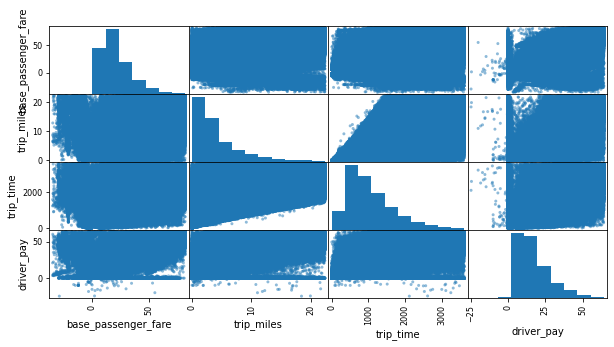

In [69]:
#pd.plotting.scatter_matrix(frame = uber_df[['base_passenger_fare', 'trip_miles', 'trip_time', 'driver_pay']], figsize=(10, 5))
